# Sprint 4

# Tasca M4 T02

## Ejercicio 2

Realiza las tareas de preprocesamiento y adecuación del Dataset que se encuentra en el repositorio de GitHub PRE-PROCESSING-DATA con el objetivo de prepararlo y trabajar con él como un dataframe para extraer información.

**Importante: El resultado final debe ser un dataframe con las variables de nombre de la película, año y género. ¡También es importante quedarse con un solo género para cada película!**

Primero importamos todas las librerias y creamos un nuevo dataset llamado `movies`.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv('movies.dat', sep='::', encoding='latin1', engine='python', header=None, names=['ID', 'Titulo', 'Genero'])
movies

,ID,Titulo,Genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


Despues, creamos dos columnas nuevas `Nombre` y `Año` dividiendo la columna `Titulo`.  También se cambia la columna de `Genero` para que solo exista un sólo género por película. Finalmente se eliminan las columnas de `Titulo` y `ID` para tener el dataset listo para su análisis.

In [3]:
movies[['Nombre', 'Año']] = movies['Titulo'].str.extract('(.*?)\s\((\d+)\)', expand=True)
movies['Genero'] = movies['Genero'].str.extract('^(\w+)')
movies = movies.drop('Titulo', axis=1)
movies = movies.drop('ID', axis=1)
movies = movies.reindex(columns=['Nombre', 'Año', 'Genero'])
movies

,Nombre,Año,Genero
0,Toy Story,1995,Animation
1,Jumanji,1995,Adventure
2,Grumpier Old Men,1995,Comedy
3,Waiting to Exhale,1995,Comedy
4,Father of the Bride Part II,1995,Comedy
...,...,...,...
3878,Meet the Parents,2000,Comedy
3879,Requiem for a Dream,2000,Drama
3880,Tigerland,2000,Drama
3881,Two Family House,2000,Drama


Para conocer el dataset, se usa `.info()` pues nos da toda la información resumida de número de columnas, filas y dtypes.  También se revisa si hay algún dato nulo o vacío.

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nombre  3882 non-null   object
 1   Año     3882 non-null   object
 2   Genero  3883 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


In [5]:
movies.isnull().sum()

Nombre    1
Año       1
Genero    0
dtype: int64

In [6]:
movies[pd.isnull(movies['Nombre'])]

,Nombre,Año,Genero
988,NaN,NaN,Comedy


In [7]:
movies = movies.dropna(subset=['Nombre', 'Año'])
movies.isna().sum()

Nombre    0
Año       0
Genero    0
dtype: int64

Se encontraron datos vacíos por lo que se procedio a buscarlos y al estar en la misma fila, se borraron pues no afectan en nada al dataset.

Finalmente, se cambia el dtype de la columna de `Año`.

In [10]:
movies.loc[:, 'Año'] = movies['Año'].astype(int)
movies['Año'] = pd.to_datetime(movies['Año'], format='%Y')
movies['Año'] = movies['Año'].dt.year
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3882 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nombre  3882 non-null   object
 1   Año     3882 non-null   int64 
 2   Genero  3882 non-null   object
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


Una vez listo el dataframe, procedemos a explorar los datos.

In [14]:
movies['Nombre'].value_counts()

Hamlet                    5
Mummy, The                3
Psycho                    2
End of the Affair, The    2
Village of the Damned     2
                         ..
Paris Was a Woman         1
Anna                      1
I'm Not Rappaport         1
Blue Juice                1
Contender, The            1
Name: Nombre, Length: 3840, dtype: int64

In [15]:
movies.loc[movies['Nombre'] == 'Hamlet']

,Nombre,Año,Genero
1388,Hamlet,1996,Drama
1872,Hamlet,1948,Drama
2751,Hamlet,1964,Drama
3529,Hamlet,2000,Drama
3654,Hamlet,1990,Drama


In [16]:
movies.Nombre.unique()

array(['Toy Story', 'Jumanji', 'Grumpier Old Men', ..., 'Tigerland',
       'Two Family House', 'Contender, The'], dtype=object)

In [17]:
movies.Nombre.nunique()

3840

In [18]:
movies.shape

(3882, 3)

In [19]:
movies.Año.nunique()

81

In [20]:
movies['Año'].sort_values(ascending=True).unique()

array([1919, 1920, 1921, 1922, 1923, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000], dtype=int64)

In [22]:
movies.Genero.nunique()

301

In [51]:
movies.Genero.value_counts()

Drama          1176
Comedy         1023
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children         89
Romance          50
Sci              46
Mystery          36
Western          33
Film             25
Musical          25
War              12
Fantasy           2
Name: Genero, dtype: int64

In [91]:
adventure = pd.DataFrame(movies[movies['Genero'] == 'Adventure'].value_counts())
adventure

,,,0
Nombre,Año,Genero,
"20,000 Leagues Under the Sea",1954,Adventure,1
"NeverEnding Story II: The Next Chapter, The",1990,Adventure,1
Mighty Joe Young,1998,Adventure,1
Mighty Peking Man (Hsing hsing wang),1977,Adventure,1
Muppet Treasure Island,1996,Adventure,1
...,...,...,...
Fly Away Home,1996,Adventure,1
For Whom the Bell Tolls,1943,Adventure,1
For the Love of Benji,1977,Adventure,1


In [88]:
movies_año = movies.groupby(['Año', 'Genero'])['Nombre'].count().reset_index().rename(columns={'Nombre': 'Numero de peliculas'})
movies_año

,Año,Genero,Numero de peliculas
0,1919,Action,1
1,1919,Adventure,1
2,1919,Comedy,1
3,1920,Comedy,2
4,1921,Action,1
...,...,...,...
618,2000,Drama,36
619,2000,Horror,4
620,2000,Romance,1
621,2000,Sci,2


In [120]:
movies_noventas = movies.query("(Año >= 1990 & Año <= 2000)")
movies_noventas

,Nombre,Año,Genero
0,Toy Story,1995,Animation
1,Jumanji,1995,Adventure
2,Grumpier Old Men,1995,Comedy
3,Waiting to Exhale,1995,Comedy
4,Father of the Bride Part II,1995,Comedy
...,...,...,...
3878,Meet the Parents,2000,Comedy
3879,Requiem for a Dream,2000,Drama
3880,Tigerland,2000,Drama
3881,Two Family House,2000,Drama


In [116]:
movies_año = movies_noventas.groupby(['Año', 'Genero'])['Nombre'].count().reset_index().rename(columns={'Nombre': 'Numero de peliculas'})
movies_año

,Año,Genero,Numero de peliculas
0,1990,Action,19
1,1990,Adventure,2
2,1990,Animation,2
3,1990,Children,1
4,1990,Comedy,15
...,...,...,...
137,2000,Drama,36
138,2000,Horror,4
139,2000,Romance,1
140,2000,Sci,2


## Ejercicio 3

Muestra tu creatividad. ¿Qué crees relevante mostrar del Dataset 'movies.dat' del ejercicio anterior?

Realiza una o dos representaciones gráficas y justifica tu elección.

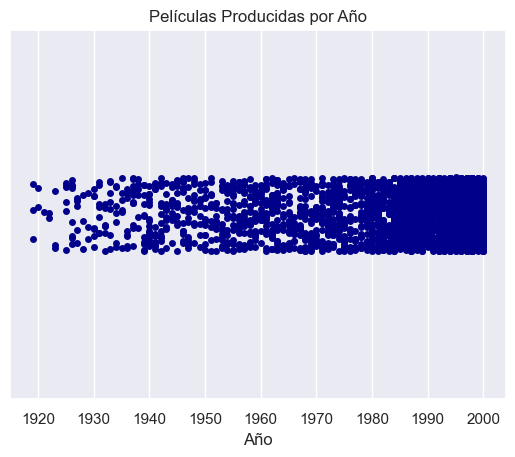

In [121]:
sns.stripplot(x=movies["Año"], orient='v', color='darkblue')
plt.title('Películas Producidas por Año')
plt.show()

Esta representación gráfica de puntos muestra la cantidad de películas producidas en el período comprendido entre 1920 y 2000. Podemos observar un crecimiento gradual desde la década de los años cuarenta hasta finales de los setenta. A partir de los años ochenta, la producción de películas explotó y hubo un aumento exponencial que se mantuvo hasta el año 2000.

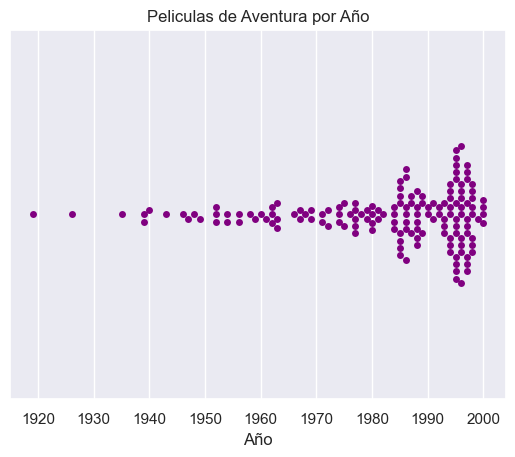

In [66]:
sns.swarmplot(data=adventure, x="Año", orient='v', color='purple')
plt.title('Peliculas de Aventura por Año')
plt.show()

Esta visualización en forma de enjambre muestra el desarrollo de películas del género de aventura durante el periodo comprendido entre 1919 y 2000. Se aprecia una distribución positiva hacia la derecha, evidenciando un incremento gradual en la producción de películas de aventura hasta la década de los ochenta. A partir de mediados de la década de los noventa, se produjo una explosión en la creación de este tipo de películas.

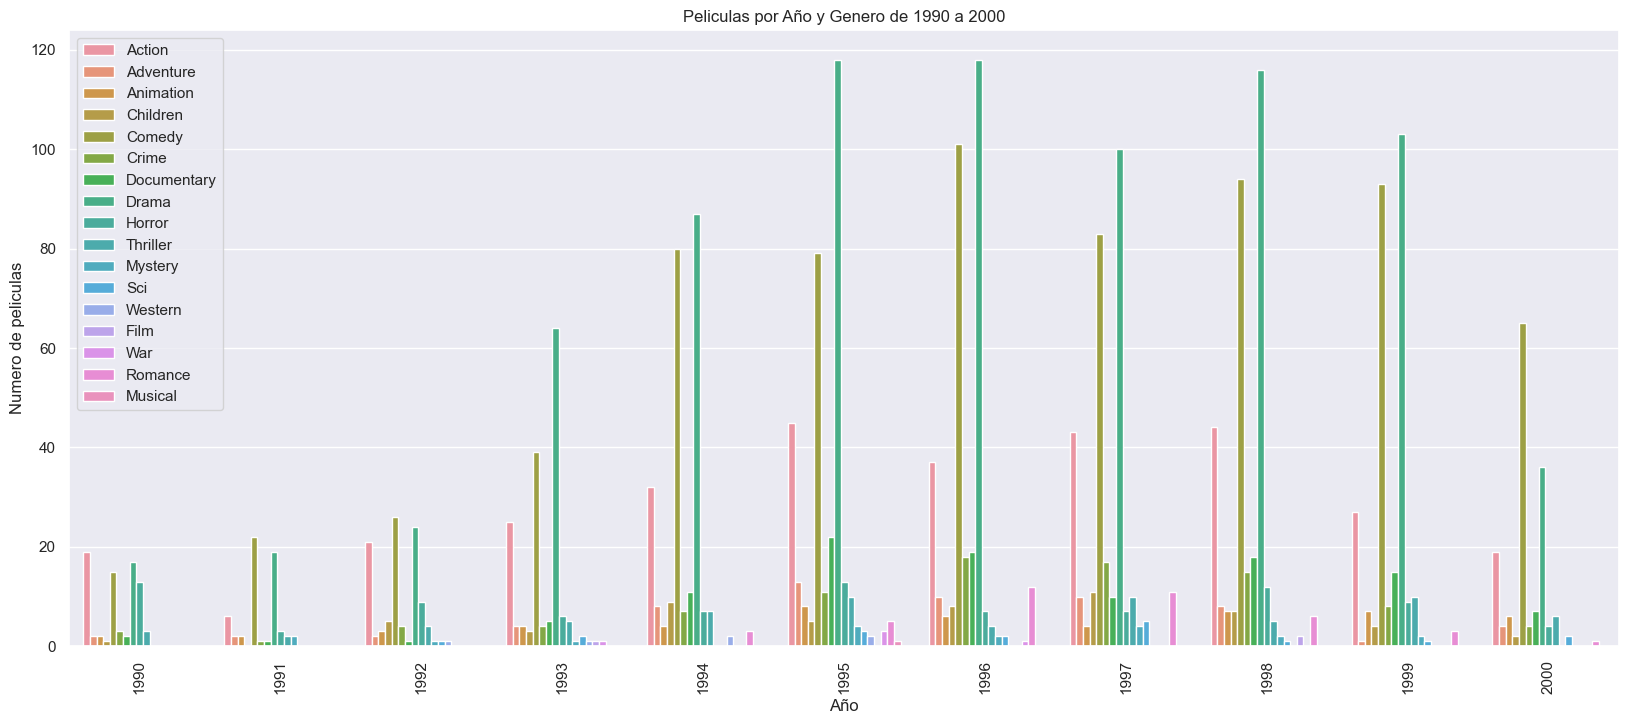

In [122]:
sns.set()
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Año', y='Numero de peliculas', hue='Genero', data=movies_año)
ax.legend(loc='upper left') 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Peliculas por Año y Genero de 1990 a 2000')
plt.show()

Esta gráfica de barras muestra la producción de películas por género y año en el período que abarca desde 1990 hasta el año 2000. Se puede observar que el género de drama fue el más popular durante esta época, destacándose los años 1995, 1996 y 1998. En segundo lugar se encuentra el género de comedia, con más producciones en 1996, 1998 y 1999. En tercer lugar están las películas de musicales, con picos en 1995, 1997 y 1998. Es interesante ver que el género musical no tuvo producciones entre 1990 y 1992; sin embargo, en 1996 y 1997 tuvo sus mejores años con una decena de producciones.

# FIN